# Data Generation using Augmentation Technique


- When the dataset is larger than the system memory, all the images can't be read inside the memory.
- So, we read the images in batches that can fit into the memory and then pass on these batches iteratively to the model for training.
- This task is done using keras using **image generator class**
- While u r training with images in DL, lot of images r required to train model.In absence of such images ur efficiency of model will be bad. By distorting images u r creating lot of variety & variation in ur data and thus augmenting data.
- Image Generator also helps in creating augmented form of data
- Image augmentation 
  - is a process where we introduce minor distortion into the image to create a new image from it.
  - This will help when the dataset is small.
  - Creating variety & variation in ur data that will help ur model understand lot of variations in ur i/p data. Predictive power of ur model will increase if u train not just on sample images but also on distorted images/augmented images.
  - Hence it helps in avoiding overfit.
  - It helps to enhance the learning process.


#### Create a Data Generator using image module
- defines several distortions that we want to apply on our images like vertical_flip, horizontal_flip, rotate_image etc.
- Task: Take the files from the directory in batches, and save it another directory - here test is the target directory

*Earlier we just used rescale option in datagen, train_datagen = ImageDataGenerator(rescale=1./255). Now we r going to add data augmentation as well.*

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
img= image.load_img('data/car.png')

In [3]:
type(img)

PIL.Image.Image

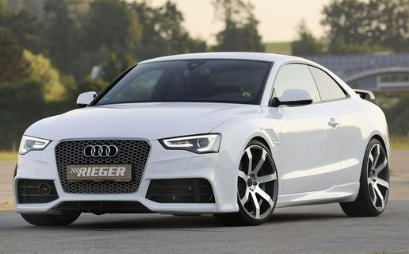

In [4]:
img

### Why convert image to array?

When you load an image using image.load_img from Keras's preprocessing module, it returns an instance of the PIL (Python Imaging Library) Image class. While the PIL Image format is great for various image manipulations and operations, deep learning models don't process images in this format. Instead, they require numerical tensors.

Numerical Operations: Deep learning models involve mathematical operations. These operations require numerical representations (e.g., matrices or tensors) to be performed. The img_to_array function converts the image into a numerical tensor so that these operations can be executed.


In [5]:
img = image.img_to_array(img)

In [6]:
img.shape  # Here 3 is dimension of channel & appears at last. 

# On certain cloud platforms, or at variants of Keras, channel inf. present first.

(254, 409, 3)

In [7]:
img=img.reshape(1,254,409,3)

### Image Data Generator

Many parameters in Image Data Generator will allow u to augment your data.

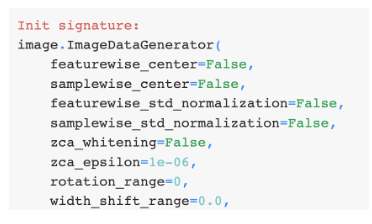

It will apply some of the distortion to image as below options & create another variant of image.

In [8]:
# Distortions to be applied on image

datagen = image.ImageDataGenerator(rotation_range=30,     # created instance of 
                                   vertical_flip=True,    # ImageDataGenerator, no reading
                                   horizontal_flip=True,
                                   fill_mode='nearest')

Just have 1 image which we read, just say flow & read that image.

In [9]:
aug_iter = datagen.flow(img, save_to_dir='data/augmented_images')  # reading img

# aug_iter here is a collection of images

***NOTE:***

    - Usually, we will not save the augmented images in a directory.
    - Instead the iterator will be passed directly to the fit method for training the model which will iterate through the batches. The fit method will implicitly iterate through the batches of augmented images, which is used to train the model

aug_iter is an iterator object. Create 10 different variations of this car image. It will randomly apply these combinations of rotation_range, vertical_flip, horizontal_flip etc. In every epoch data will be augmented randomly.

*Image generator gives us an iterator. Iterator means something which u can loop through e.g. a list is an iterator, a tuple is an iterator, a numpy array is an iterator. Here we r iterating over the images*

However, it's worth noting that if you were to pre-compute the augmented data and save it (i.e., create a fixed augmented dataset before training), then the augmented data would remain the same across epochs. But the dynamic on-the-fly augmentation method is more memory-efficient and offers a broader range of augmented samples over many epochs. On-the-fly data augmentation (as is commonly done with Keras's ImageDataGenerator), the augmented data can be different in every epoch. This is because the augmentations are applied randomly each time an image is fetched for training.

So if u have insufficient data, augmentation will ensure that across all the epochs e.g. if 10 epocs u will be running with 10 different augented variants of all those 100 images. 100 with 1 set, 100 with another set, 100 with another set etc & 10 sets of 100 images as 10 epochs so total 1000 images augmented variations in which u train.

In [10]:
i=0
for batch in aug_iter:
    i=i+1
    if i==10:
        break

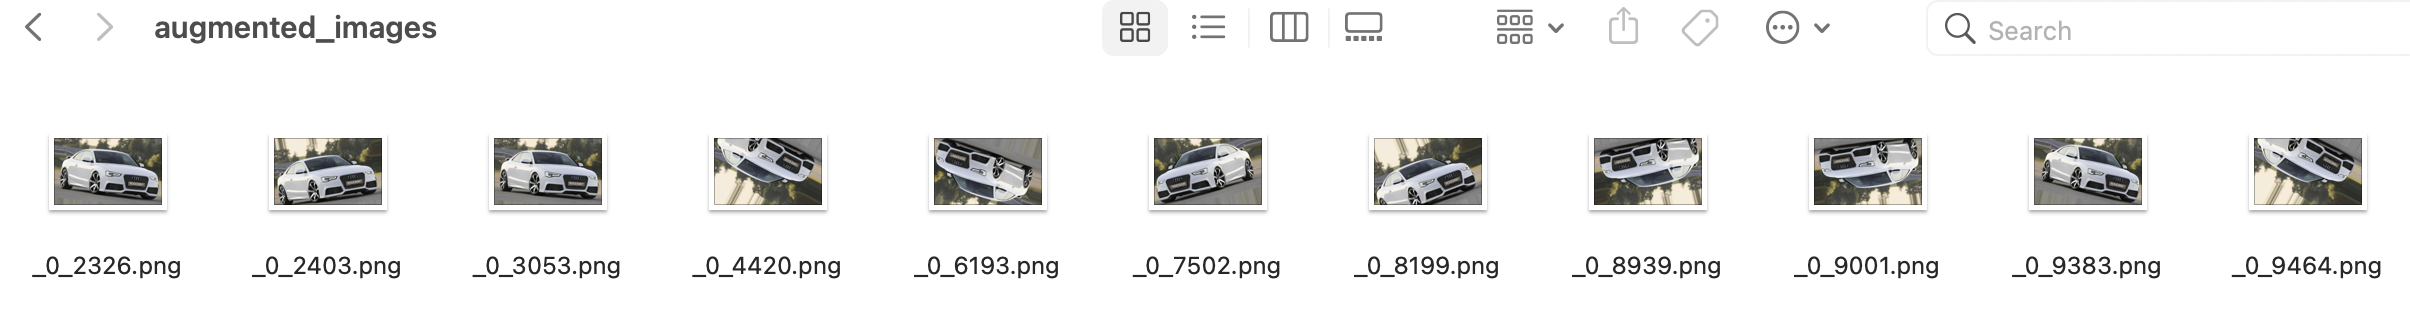

Here we r printing the augmented version pictures through loop, generally u just pass ur aug_iter(generally named as train_set) into model training.

*<font color=blue>With 1 single image we were able to create multiple augmented versions of the same image (here just 1 car image, we used distortions & made 10 images out of it).*

When we r training model in epochs we will ensure there is only 1 augmented image corresponding to each actual image, to avoid many duplicates.
e.g. if u want to create 100 augmented images, even if u take all possible combinations of rotation_range,  vertical_flip, horizontal_flip etc its going to repeat. Hence we need to adjust/customize this during training inorder to ensure 1 image has 1 augmented image only during each epoch so duplicates do not occur.



# Reading multiple images from directory

In [14]:
gen=image.ImageDataGenerator(rescale = 1/255)   #no distortion used as of now

In [15]:
v_batch_size = 15

In [16]:
# flow_from_directory - keeps reading images from disk in batches (by default batch size=32) 
# and passes to the fit function to process/train in memory

# train_gen_dir is called as iterator.

In [17]:
train_gen_dir=gen.flow_from_directory('data/waffle_pancakes_ds/train',
                                       batch_size=v_batch_size,
                                       save_to_dir='data/waffle_pancakes_ds/Augmented_Images',
                                       shuffle=False,
                                       target_size=(224,224))

Found 735 images belonging to 2 classes.


    - The output above clearly shows that there are two classes of images.
    - Hence it is important to arrange the images in appropriate folder structure.
    - The ImageDataGenerator object train_gen_dir acts as an iterator and it can be looped over.
    - It loops over each batch of images

In [18]:
i=0
for batch in train_gen_dir:
    i=i+1 #Increment i after reading one batch of images
    if i==1:    # In 1 batch we have 15 images as mentioned above
        break #Exit the Loop after reading the first batch

***NOTE:***
-  Check the output in Augmented_Images folder. 
- It was empty before and now contains 15 images - which is a batch size.
- Each image is an exact replica of the original images cz in gen=image.ImageDataGenerator(rescale = 1/255) we have only rescale option, we have not applied any augmentations on images.

## Create a new generator with some flips
- Go to Augmented_Images folder and delete all the previous images stored.
- And then execute the following code.
- You can then check the folder - and observe some of the images are flipped.

OR 

- Just create a new folder Augmented_new and observe the flipped/shifted etc augmented images for 1 batch (i.e. 15 images) since flow_from_directory reads batch by batch.


*<font color=blue>We just need to create the object of ImageDataGenerator and an iterator for flow_from_directory*

In [19]:
gen=image.ImageDataGenerator(vertical_flip=True, 
                             horizontal_flip=True,
                             rotation_range=30,
                             fill_mode='nearest',
                             rescale=1/255)   #apply some distortion

In [20]:
train_gen_dir=gen.flow_from_directory('data/waffle_pancakes_ds/train',
                                       batch_size=v_batch_size,
                                       save_to_dir='data/waffle_pancakes_ds/Augmented_new',
                                       shuffle=False,
                                       target_size=(224,224))

Found 735 images belonging to 2 classes.


### 15 Images (1 batch)

    - Below code picks up 15 images(batch_size) from the waffle_pancakes/train directory, augments them and saves it to directory - waffle_pancakes/Augmented_new
    - Here 1 batch of 15 images will be augmented and saved into the directory waffle_pancakes/Augmented_Images

In [21]:
i=0
for batch in train_gen_dir:
    i=i+1 #Increment i after reading one batch of images
    if i==1:
        break #Exit the Loop after reading the 1 batch of images

### 75 Images (5 batches)

    - Below code picks up 75 images(batch_size) from the waffle_pancakes/train directory, augments them and saves it to directory - waffle_pancakes/Augmented_Images
    - Every image from the source directory is augmented exactly once
    - Here 5 batches of 15 images (total of 75 images) will be augmented and saved into the directory waffle_pancakes/Augmented_Images
    - Here Batch Size is set to 15 and the No. of Batches is 5

In [22]:
i=0
for batch in train_gen_dir:
    i=i+1 #Increment i after reading one batch of images
    if i==5:
        break #Exit the Loop after reading the 5 batches of images

### <font color=blue>For All 735 Images (Number of batches=samples/batch_size)

Our entire data is not being consumed, we will have to create augmented versions of all r training data.

    - v_batch_size = 15
    - if the No. of Batches is set to train_gen_dir.samples/batch_size then all the training samples will be picked up only once for augmentation and saved in the directory : waffle_pancakes/Augmented_Images
    - In this case 735/15 = 49 batches for training so that each image is augmented only once.

In [25]:
batches = train_gen_dir.samples/v_batch_size

batches = np.round(batches,0)

batches

49.0

In [26]:
i=0
for batch in train_gen_dir:
    i=i+1
    if i==batches: #Read 49 batches of 15 images each = 49*15 = 735 images
        break

***NOTE:***

    - Usually, we will not save the augmented images in a directory.
    - Instead the iterator will be passed directly to the fit method for training the model which will iterate through the batches. The fit method will implicitly iterate through the batches of augmented images, which is used to train the model
    - The augmented images will be generated on the fly, directly passed to training & processed in memory. It is not kept on disk which will be a costly affair.

*In every epoch different kind of augmentation is created. But within an epoch we don't duplicate it.*